In [1]:
pip install tensorflow


In [2]:
!pip install pandas openpyxl


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
# Leer el DataFrame
df = pd.read_excel('/content/Tabla_train_hogares1.xlsx', engine='openpyxl')  # Reemplaza con la ruta de tu archivo CSV
df = pd.get_dummies(df, columns=['Cat_Ocup_JHogar', 'Posc_Ocup_JHogar', 'Educ_JHogar','SS_Jefe'])
df['Sexo_JHogar'] = df['Sexo_JHogar'].map({'Male': 1, 'Female': 0})
# Convertir la columna 'Pobreza' a valores numéricos
df['Pobreza'] = df['Pobreza'].map({'si': 1, 'no': 0})
df.drop('Dominio', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)


# Paso 2: Normalizar las variables numéricas (excepto la columna 'Pobreza')
features = df.drop(columns=['Pobreza'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Paso 3: División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['Pobreza'], test_size=0.2, random_state=123)

# Paso 4: Crear y compilar el modelo de red neuronal
model = Sequential()
model.add(Dense(units=1, input_dim=X_train.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(), metrics=['mean_squared_error'])

# Paso 5: Entrenar el modelo
history = model.fit(X_train, y_train, epochs=5, verbose=1, batch_size=8)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# history.history es un diccionario que contiene las métricas registradas durante el entrenamiento
print(history.history)


Epoch 1/5
16496/16496 [==============================] - 44s 2ms/step - loss: 0.2496 - mean_squared_error: 0.2496
Epoch 2/5
16496/16496 [==============================] - 37s 2ms/step - loss: 0.1415 - mean_squared_error: 0.1415
Epoch 3/5
16496/16496 [==============================] - 38s 2ms/step - loss: 0.1233 - mean_squared_error: 0.1233
Epoch 4/5
16496/16496 [==============================] - 38s 2ms/step - loss: 0.1185 - mean_squared_error: 0.1185
Epoch 5/5
16496/16496 [==============================] - 38s 2ms/step - loss: 0.1183 - mean_squared_error: 0.1183
{'loss': [0.24957014620304108, 0.14153887331485748, 0.12326839566230774, 0.11854308843612671, 0.11825498193502426], 'mean_squared_error': [0.24957014620304108, 0.14153887331485748, 0.12326839566230774, 0.11854308843612671, 0.11825498193502426]}


In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error


predictions = model.predict(X_test)
# Asumiendo que 'predictions' son tus predicciones y 'y_test' son las etiquetas verdaderas:
rmse_result = np.sqrt(mean_squared_error(y_test, predictions))


print(f"RMSE: {rmse_result}")

1031/1031 [==============================] - 1s 1ms/step
RMSE: 0.34088915458039204


{'loss': [0.3710116446018219, 1.0565193891525269, 1.5859675407409668, 1.8011468648910522, 1.89426589012146], 'mean_squared_error': [0.3710116446018219, 1.0565193891525269, 1.5859675407409668, 1.8011468648910522, 1.89426589012146]}
1031/1031 [==============================] - 2s 2ms/step
RMSE: 1.066623846956523


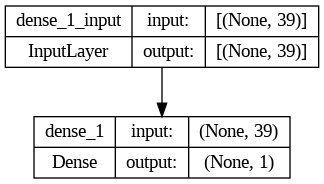

In [3]:

#MODELO 2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
# Asumiendo que x_train y y_train ya están definidos y preprocesados

# Construir el modelo secuencial con Keras
model_simple_relu = Sequential()
model_simple_relu.add(Dense(units=1, input_shape=(X_train.shape[1],), activation="relu"))

# Compilar el modelo
model_simple_relu.compile(
    loss="mean_squared_error",
    optimizer=RMSprop(),
    metrics=["mean_squared_error"]
)

# Entrenar el modelo
history = model_simple_relu.fit(X_train, y_train, epochs=5, verbose=0, batch_size=8)
print(history.history)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Realizar predicciones
predictions = model_simple_relu.predict(X_test)

# Calcular RMSE
rmse_result = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_result}")

# Visualizar la estructura del modelo (opcional)
# Para instalar el paquete necesario para visualizar la estructura del modelo puedes usar:
# pip install pydot pydotplus graphviz
plot_model(model_simple_relu, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Para mostrar la imagen del modelo en el notebook (si estás usando Jupyter)
from IPython.display import Image
Image(filename='model_plot.png')


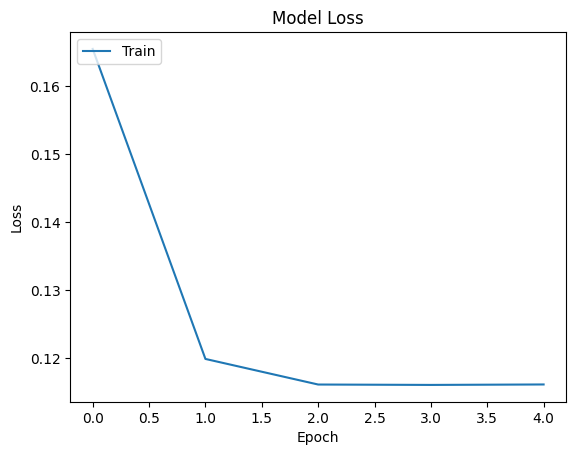

1031/1031 [==============================] - 1s 1ms/step
RMSE: 0.34033607917017467


In [4]:
#MODELO 3
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Asumiendo que x_train y y_train ya están definidos y preprocesados

# Crear un modelo de red neuronal más simple
model_simple_tanh = Sequential()
model_simple_tanh.add(Dense(units=1, input_shape=(X_train.shape[1],), activation="tanh"))

# Compilar el modelo
model_simple_tanh.compile(
    loss="mean_squared_error",
    optimizer=RMSprop(),
    metrics=["mean_squared_error"]
)

# Entrenar el modelo
history = model_simple_tanh.fit(X_train, y_train, epochs=5, verbose=0, batch_size=32)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Realizar predicciones
predictions = model_simple_tanh.predict(X_test)

# Calcular RMSE
rmse_result = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_result}")


Epoch 1/5
4124/4124 - 9s - loss: 0.0896 - mean_squared_error: 0.0896 - 9s/epoch - 2ms/step
Epoch 2/5
4124/4124 - 8s - loss: 0.0616 - mean_squared_error: 0.0616 - 8s/epoch - 2ms/step
Epoch 3/5
4124/4124 - 8s - loss: 0.0427 - mean_squared_error: 0.0427 - 8s/epoch - 2ms/step
Epoch 4/5
4124/4124 - 8s - loss: 0.0365 - mean_squared_error: 0.0365 - 8s/epoch - 2ms/step
Epoch 5/5
4124/4124 - 7s - loss: 0.0330 - mean_squared_error: 0.0330 - 7s/epoch - 2ms/step


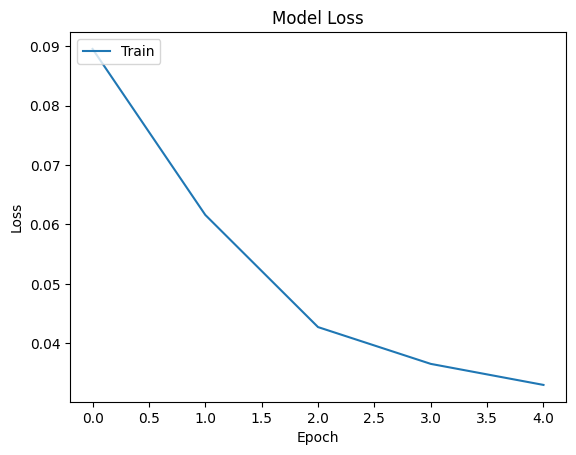

1031/1031 [==============================] - 2s 2ms/step
RMSE: 0.17672223481191995


In [5]:
#MODELO 4
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
# Crear un modelo de red neuronal profundo
model_profundo = Sequential()
model_profundo.add(Dense(units=64, input_shape=(X_train.shape[1],), activation="relu"))
model_profundo.add(Dense(units=1))  # Capa de salida para regresión

# Graficar la arquitectura del modelo
plot_model(model_profundo, to_file='model_profundo.png', show_shapes=True, show_layer_names=True)
Image(filename='model_profundo.png')  # Muestra la imagen en un Jupyter Notebook

# Compilar el modelo
model_profundo.compile(
    loss="mean_squared_error",  # Función de pérdida para regresión
    optimizer=RMSprop(),  # Selecciona el optimizador adecuado
    metrics=["mean_squared_error"]
)

# Entrenar el modelo
history = model_profundo.fit(X_train, y_train, epochs=5, verbose=2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Realizar predicciones
predictions = model_profundo.predict(X_test)

# Calcular RMSE y ver el resultado
rmse_result = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_result}")


Epoch 1/15
4124/4124 - 10s - loss: 0.0561 - mean_squared_error: 0.0561 - 10s/epoch - 2ms/step
Epoch 2/15
4124/4124 - 8s - loss: 0.0362 - mean_squared_error: 0.0362 - 8s/epoch - 2ms/step
Epoch 3/15
4124/4124 - 9s - loss: 0.0240 - mean_squared_error: 0.0240 - 9s/epoch - 2ms/step
Epoch 4/15
4124/4124 - 9s - loss: 0.0203 - mean_squared_error: 0.0203 - 9s/epoch - 2ms/step
Epoch 5/15
4124/4124 - 8s - loss: 0.0183 - mean_squared_error: 0.0183 - 8s/epoch - 2ms/step
Epoch 6/15
4124/4124 - 9s - loss: 0.0169 - mean_squared_error: 0.0169 - 9s/epoch - 2ms/step
Epoch 7/15
4124/4124 - 9s - loss: 0.0157 - mean_squared_error: 0.0157 - 9s/epoch - 2ms/step
Epoch 8/15
4124/4124 - 8s - loss: 0.0152 - mean_squared_error: 0.0152 - 8s/epoch - 2ms/step
Epoch 9/15
4124/4124 - 9s - loss: 0.0143 - mean_squared_error: 0.0143 - 9s/epoch - 2ms/step
Epoch 10/15
4124/4124 - 9s - loss: 0.0139 - mean_squared_error: 0.0139 - 9s/epoch - 2ms/step
Epoch 11/15
4124/4124 - 8s - loss: 0.0134 - mean_squared_error: 0.0134 - 8s/e

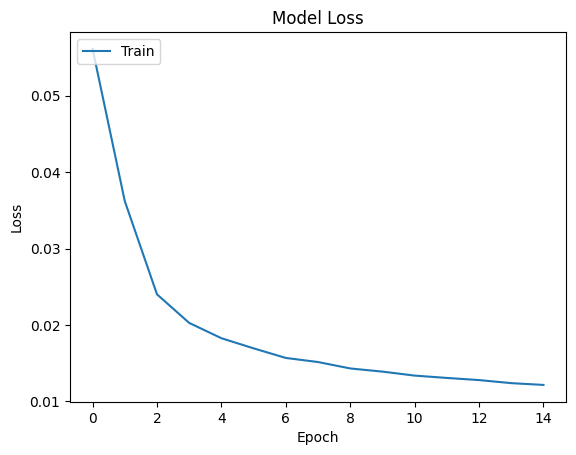

Test loss: 0.013789966702461243
1031/1031 [==============================] - 2s 2ms/step
RMSE: 0.11743064637630511


In [6]:
#modelo 5
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Definir el modelo de regresión
model = Sequential()
model.add(Dense(units=64, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(units=32, activation="relu"))
model.add(Dense(units=1))  # Capa de salida para regresión

# Graficar la arquitectura del modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image(filename='model.png')  # Muestra la imagen en un Jupyter Notebook

# Compilar el modelo
model.compile(
    loss="mean_squared_error",  # Función de pérdida para regresión
    optimizer=RMSprop(),  # Selecciona el optimizador adecuado
    metrics=["mean_squared_error"]
)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=15, verbose=2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()
# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])

# Realizar predicciones
predictions = model.predict(X_test)

# Calcular RMSE y ver el resultado
rmse_result = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse_result}")

